# In this notebook we will start with the basic method of SENTIMENT ANALYSIS.


# Problem statement: Given a customer review can we predict the rating of the review (1-5). 1 being negative and 5 being positive.

# We will try using bag of words model for this experiment and traditional ML algorithms to predict the outcome.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re # regex lib for cleaning
from nltk.corpus import stopwords # list of stopwords
from nltk.stem import WordNetLemmatizer # for lemmatizing (years to year)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler #undersampling
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import classification_report # precision, recall, f1

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('cleaned_reviews.csv')
df.head()

,cleaned_reviews,rating,review_length_10
0,excellent,5,excellent
1,dog become healthy thank,5,dog become healthy thank
2,quality service everyone happy,5,quality service everyone happy
3,went top dog raw food morning first time amazi...,5,went top dog raw food morning first time amazi...
4,very stylish site enough information make choi...,5,very stylish site enough information make choi...


# Creating Bag of words model.

## Limiting the no. features to 500. It is expensive to create features using bag of words that treats each new word as a feature.

In [8]:
Cnt_vec = CountVectorizer(max_features=500)

## Creates an array using Bag of words.

In [24]:
bag_words = Cnt_vec.fit_transform(df['cleaned_reviews']).toarray()

In [25]:
np.savez_compressed('bow_data.npz', bag_words)

In [26]:
# Target variable 
y_rating = df['rating'].to_numpy()
np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/target_data.npz', y_rating)


In [27]:
print('shape of feature matrix:',bag_words.shape,'shape of target variable', y_rating.shape)

shape of feature matrix: (1194697, 500) shape of target variable (1194697,)


## Creates an array using TF_IDF.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#limiting features to 500
tf_idf = TfidfVectorizer(max_features=500)

In [12]:
bow_tf_idf = tf_idf.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/tf_idf_data.npz', bow_tf_idf)

# bag of words for length 10.

In [9]:
bag_words = Cnt_vec.fit_transform(df['review_length_10']).toarray()
np.savez_compressed('bow_len10_data.npz', bag_words)

## Creates Bigrams using bow

In [15]:
Cnt_vec = CountVectorizer(max_features=500, ngram_range=(1,2))

bi_grm_bow = Cnt_vec.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_bow_data.npz', bi_grm_bow)

## Creates Bigrams using Tf_idf

In [11]:
tf_idf = TfidfVectorizer(max_features=500, ngram_range=(1,2))

bi_grm_tf_idf = tf_idf.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_tf_idf_data.npz', bi_grm_tf_idf)

# Demo model on length of 10.

In [ ]:
# Undersampling object
rus = RandomUnderSampler(sampling_strategy={1:26000,2:26000,3:26000,4:26000,5:26000},random_state=0)
def under_sample(x,y):
    
    X_resampled, y_resampled = rus.fit_resample(x,y)
    return X_resampled, y_resampled

In [ ]:
X_resampled, y_resampled = under_sample(bag_words[0:1189697,], y_rating[0:1189697])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Test data 
X_test, y_test = bag_words[1189697:,] , y_rating[1189697:]

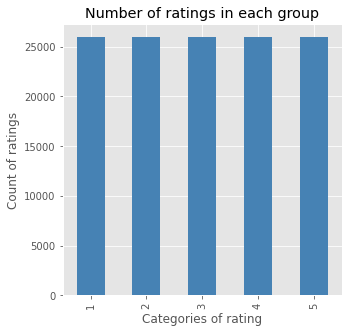

In [ ]:
dis = pd.value_counts(y_resampled, sort=False)
dis.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()